<a href="https://colab.research.google.com/github/adasegroup/ML2022_seminars/blob/master/seminar5/Trees_Bagging_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Trees, Bootstrap Aggregation (Bagging) and Random Forest
Machine Learning by professor Evgeny Burnaev

Author: Andrey Lange and Alexander Marusov

In [ ]:
! pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 5)

# Example 1: Regression tree

          x1         y
0   1.646441  0.192209
1   2.145568 -0.743480
..       ...       ...
98  2.486820  1.053474
99  0.014086  0.104399

[100 rows x 2 columns]


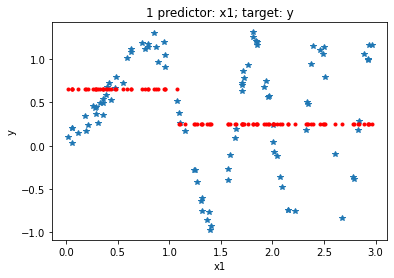

Mean Squared Error:  0.3550636421014569


In [ ]:
# prepare and show a dataset
n = 1                         # number of features
N = 100**n                    # number of samples
np.random.seed(0)
X = np.random.random((N, n))*3
coeffs = 1 +  2 * np.random.random((n, 1))
y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))/3
y = y.ravel()
print((pd.DataFrame({'x1': X[:, 0], 'y': y})))
plt.plot(X, y, '*')
plt.title('1 predictor: x1; target: y')
plt.xlabel('x1')
plt.ylabel('y')

# train and predict a regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf = DecisionTreeRegressor(max_depth=1)
clf.fit(X, y)
y_pred = clf.predict(X)

plt.plot(X, y_pred, '.r')
plt.show()

print('Mean Squared Error: ', mean_squared_error(y, y_pred))

### Question 1.1: Change the number of levels in a regression tree above until the best approximation of the training set. What is the best MSE?

### Solution 1.1:
When `max_depth=12` then 
<br>
`Mean Squared Error:  0.0`

### Question 1.2: Calculate MSE above without `mean_squared_error()` calling.

### Solution 1.2:

```
print('Mean Squared Error: ', ((y - y_pred)**2).mean())
```

## Example 2: Regression tree with $n=2$ features

### Question 2.1: Lets try an example with $n=2$ features. Train a regression stump (a tree of a depth 1) and see the optimal threshold (border between colors) for the best feature chosen for split among $x_1$ and $x_2$. What feature was chosen and why? Change something in the string 
```
coeffs = np.array([[0.2], [1.5]])
```
### to make another feature is chosen as the best for split.



### Question 2.2: Find the optimal `max_depth` hyperparameter when MSE on the training set is the best.

            x1        x2         y
0     0.987864  1.287341  0.575163
1     1.084974  0.980790  1.007940
...        ...       ...       ...
9998  0.536880  0.803620  1.100161
9999  0.648228  1.126596  1.127278

[10000 rows x 3 columns]


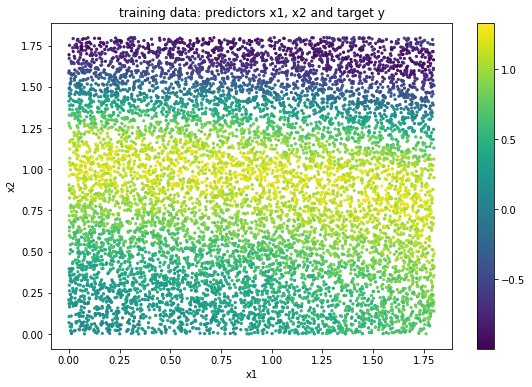

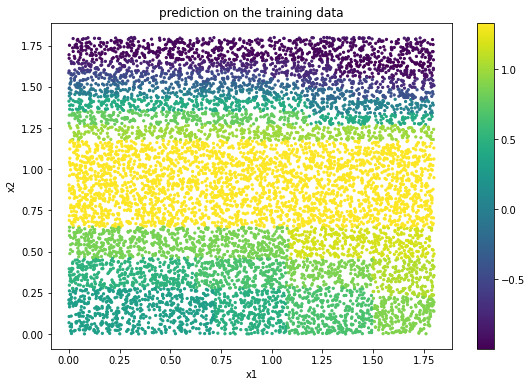

Mean Squared Error:  0.016911218331871206


In [ ]:
# prepare and show a dataset in 2D
n = 2               # number of features
N = 100**n          # number of samples
np.random.seed(0)
X = np.random.random((N, n))*1.8

# Change something to make another feature is chosen for split by some optimal threshold
coeffs = np.array([[0.2], [1.5]])
y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))/3

# print dataset
print((pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y.ravel()})))

# show target y in (x1, x2) space
plt.figure(figsize=[9, 6])
sc = plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=5)
plt.colorbar(sc)
plt.title('training data: predictors x1, x2 and target y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# train and predict by a regression tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y)
y_pred = clf.predict(X)

# show prediction in (x1, x2) space
plt.figure(figsize=[9, 6])
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5)
plt.colorbar(sc)
plt.title('prediction on the training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print('Mean Squared Error: ', mean_squared_error(y, y_pred))

### Solution 2.1:

When the range of any feature is split by optimal threshold each of 2 regions are approximated by constant values. The feature which provides better approximation of the function for each region is chosen.

You can simply swap the coefficients.


### Solution 2.2: The more the depth of the tree the better approximation it gives

## Example 3: Regression tree: training and testing sets

### Question 3.1: Now we consider training and testing sets. Try different depths of a decision tree to see when the model is underfitted and when the one is overfitted to the training set. Plot the MSE on the testing set depending on `max_depth` hyperparameter. What is the optimal value?

train MSE:  0.05980325743626714
test MSE:  0.17306129781924742


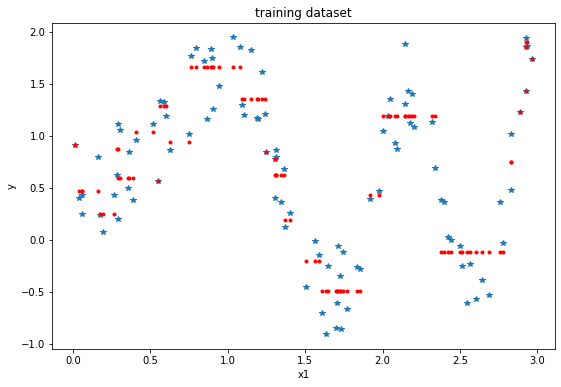

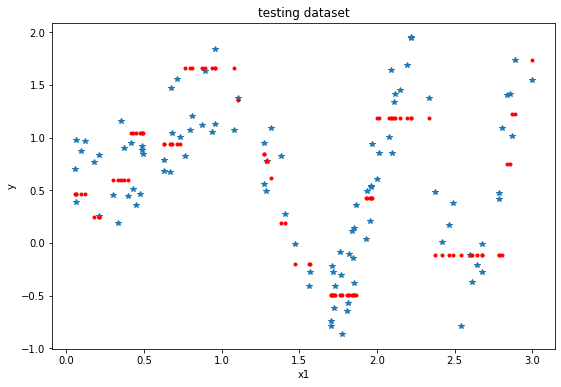

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# prepare dataset
n = 1                         # number of features
N = 200**n                    # number of samples
np.random.seed(0)
X = np.random.random((N, n))*3
coeffs = 1 +  2 * np.random.random((n, 1))
y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2, random_state=0)

# --- change this block to select the best max_depth
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train, y_train)
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))
# ---

plt.figure(figsize=[9, 6])
plt.plot(X_train, y_train, '*')
plt.plot(X_train, clf.predict(X_train), '.r')
plt.title('training dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

plt.figure(figsize=[9, 6])
plt.plot(X_test, y_test, '*')
plt.plot(X_test, clf.predict(X_test), '.r')
plt.title('testing dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

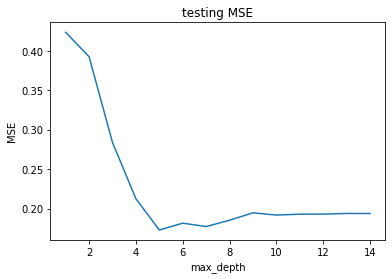

In [ ]:
# Depending MSE on the testing set depending on max_depth hyperparameter.
test_mse = []
max_depth_range = range(1, 15)
for md in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=md)
    clf.fit(X_train, y_train)
    test_mse += [mean_squared_error(y_test, clf.predict(X_test))]
plt.plot(max_depth_range, test_mse)
plt.title('testing MSE')
plt.ylabel("MSE")
plt.xlabel('max_depth')
plt.show()

In [ ]:
optim_mse = min(list(zip(test_mse, max_depth_range)), key = lambda x: x[0])
print("Optimal MSE on test is: {}".format(optim_mse[0]))

Optimal MSE on test is: 0.17306129781924742


### Question 3.2. How many constant-valued regions of red points are on the picture when `max_depth=5`?



### Solution 3.2. Not more than $2^5 = 32$


# Example 4: Bagging = Decision Tree + Bootstrap
### In the question above we've found the optimal `max_depth` for the case of single Decision Tree. By limiting the tree depth we distort the fitting to the training dataset and prevent the model from overfitting. 
### The second way to prevent overfitting is to distort the ... training dataset itself. What is Bagging?
### We train many trees each on a Bootstraped training dataset (it contains the same number of samples but some of them are included with some number of their copies, and some of them are not included). Then we average over all such trees. It is called Bootstrap aggregation - Bagging.

### Question 4.1: Compare the prediction above (single tree) with Bagging all with `max_depth=5`. Why Bagging approximation red dots does not look like constant-valued regions as in a single decision tree? Tune the best number of trees. Has  Bagging improved the single tree model regarding `test MSE`?

### Question 4.2: Sometimes it is good to be a perfectionist and unittest any code :). Unittest scikit-learn! Should `DecisionTreeRegressor` and `BaggingRegressor`  give the same results in some special case? Simplify Bagging to the single Decision Tree and show the same pictures as above when `max_depth=5`. What parameter `n_estimators` have to be set to? Do we need to change any other hyperparameters?

train MSE:  0.05980325743626714
test MSE:  0.1730612978192474


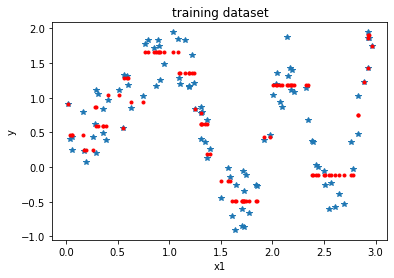

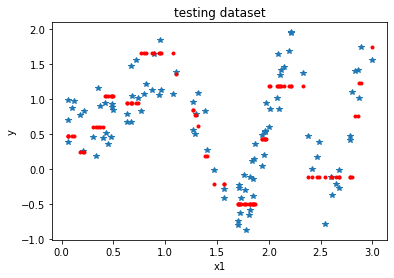

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# prepare dataset
n = 1                         # number of features
N = 200**n                    # number of samples
np.random.seed(0)
X = np.random.random((N, n))*3
coeffs = 1 +  2 * np.random.random((n, 1))
y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2, random_state=0)

# --- 1. change this block to select the best n_estimators
# --- 2. change this block to simplify Bagging to ordinary single decision tree
clf = BaggingRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=3, bootstrap=False, random_state=0)
clf.fit(X_train, y_train.ravel())
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))
# ---

# plt.figure(figsize=[9, 6])
plt.plot(X_train, y_train, '*')
plt.plot(X_train, clf.predict(X_train), '.r')
plt.title('training dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

# plt.figure(figsize=[9, 6])
plt.plot(X_test, y_test, '*')
plt.plot(X_test, clf.predict(X_test), '.r')
plt.title('testing dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

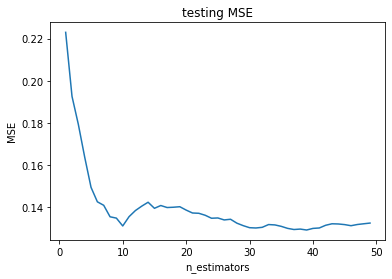

In [ ]:
# Plot dependency between test MSE and number of trees
test_mse = []
n_estimators_range = range(1, 50)
for ne in n_estimators_range:
    clf = BaggingRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=ne, bootstrap=True, random_state=0)
    clf.fit(X_train, y_train.ravel())
    test_mse += [mean_squared_error(y_test, clf.predict(X_test))]
plt.plot(n_estimators_range, test_mse)
plt.title('testing MSE')
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# Searching for optimal number of trees in bagging
optim_n_estimators = min(list(zip(test_mse, n_estimators_range)), key = lambda x: x[0])
print("Optimal number of trees in bagging is: {}".format(optim_n_estimators[1]))

Optimal number of trees in bagging is: 39


### Solution 4.2: 

```n_estimators=1, bootstrap=False```

is the equivalent to single Decision Tree

### Question 4.3: Estimate the part of points that are not selected after Bootstrap procedure analytically. Consider the sample of a size $N\to\infty$.

### Solution 4.3: 

Bootstrap selects a point randomly and replaces its copy back to the dataset keeping it unchanged, and it makes this selection $N$ times providing as a result $N$ points, some of which can have their copies among the selected points. Therefore, the propability of any point to be selected after one choice is $1/N$, not to be selected $1-1/N$. So, after $N$ choices we have

$$ \lim_{N\to\infty} \left(1-\frac{1}{N}\right)^N = \frac{1}{e}.$$

It means that Bootstrap ignores more than 1/3 of points.

# Example 5: Random Forest = Bagging + (`max_features' < $n$)

## Can we reduce the overfitting more? - YES!!! <br> Along with Bootstrap reduce the number of features among which the best feature for each tree in ensemble is chosen!

### Question 5.1: Tune `max_features` to improve the tesing MSE. Check that testing MSE becomes better. And what happens with training MSE and why?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# prepare dataset
n = 100           # number of features
N = 10**4         # number of samples
np.random.seed(0)
X = np.random.random((N, n))*3
coeffs = 1 +  2 * np.random.random((n, 1))
y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((N, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2, random_state=0)

# --- change this block to select the best max_features
clf = RandomForestRegressor(max_depth=5, n_estimators=10, max_features=n, random_state=0)
clf.fit(X_train, y_train.ravel())
print('train MSE: ', mean_squared_error(y_train, clf.predict(X_train)))
print('test MSE: ', mean_squared_error(y_test, clf.predict(X_test)))
# ---

train MSE:  0.5239200367981132
test MSE:  0.5915462455328179


### Solution 5.1: 

One must reduce `max_features`, in this particular case down to 1.
<br>
Testing MSE becomes better (decreases) although training MSE becomes worse (increases) and this is OK!

## Random Forest on Kaggle data

https://medium.com/analytics-vidhya/credit-default-analysis-using-machine-learning-from-scratch-part-1-8dbaad1fae14

**Task:** We should predict probability that somebody will experience financial distress in the next two years given some characteristics. So we have **binary classification**. The target variable is **SeriousDlqin2yrs**

The data was taken from https://www.kaggle.com/c/GiveMeSomeCredit

Good descripton of current dataset variables: https://rstudio-pubs-static.s3.amazonaws.com/434905_b61dfec2f4ef49e78ba2efc28d440aff.html#introduction

### 1. Data preprocessing and EDA

Since our task is to learn random forests, we wouldn't go into many data preprocessing steps. But in general it is very important step and you can find interesting preprocessing steps for current dataset, for example, here: https://medium.com/analytics-vidhya/credit-default-analysis-using-machine-learning-from-scratch-part-1-8dbaad1fae14

Here are some important preprocessing steps (https://neptune.ai/blog/data-preprocessing-guide), which you generally should do:

1. Missing Values Analysis

2. Outlier Analysis

3. Scaling

4. Dimensionality reduction

5. Maybe you will need some feature engineering

Also when you are solving classification task you should check for imbalance classification.

In [ ]:
rand_state = 123

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2022_seminars/master/seminar5/give_me_some_credit.csv', index_col=0)

In [ ]:
df_kaggle_test = pd.read_csv('https://raw.githubusercontent.com/Astralex98/Give-me-some-credit-Kaggle-/main/cs-test.csv', index_col=0)

In [ ]:
df_kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [ ]:
# There are no any labels in test, so we just remove this column
df_kaggle_test = df_kaggle_test.drop(['SeriousDlqin2yrs'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
# Check for imbalance
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

**Summary of quick EDA:**

1. There are some missing values

2. Our classification task is highly imbalanced

#### 1.1. Missing values

Since random forests can't deal with NaNs, we should somehow deal with them. About strategies for dealing with missing values:https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e 

We can see, that features **MonthlyIncome**(20%) and **NumberOfDependents** (3%) have some missing values. From our intuition we can understand that **MonthlyIncome** is highly important feature for our task. Consequently, dropping those data-points could be a not a good idea. Now, for the sake of simplicity, we can just impute NaNs with means of corresponding features.

In [ ]:
# Method to preprocess data
def df_preproc(df):

  # Deal with NaNs
  df["MonthlyIncome"] = df["MonthlyIncome"].replace(np.NaN,  df["MonthlyIncome"].mean())
  df["NumberOfDependents"] = df["NumberOfDependents"].replace(np.NaN,  df["NumberOfDependents"].mean())

  # small check for NaNs
  if ((df["MonthlyIncome"].isnull().values.any() == True) or (df["NumberOfDependents"].isnull().values.any())):
    print("There are some NaNs here!")
    return None
  
  return df


In [ ]:
# preprocessed data
df_train = df_preproc(df_train)
X_kaggle_test = df_preproc(df_kaggle_test)

### 2. Dividing data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['SeriousDlqin2yrs'], axis=1), df_train['SeriousDlqin2yrs'], test_size = 0.3, random_state=rand_state, shuffle = True)

In [ ]:
 # use only each 10th sample to save a time
X_train = X_train.iloc[::10, :]
y_train = y_train.iloc[::10] 

In [ ]:
n_features = X_train.shape[1]

### 3. Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
# n_estimators - The number of trees in the forest.
#
# max_depth - The maximum depth of the tree. If None, then nodes are expanded until 
#             all leaves are pure or until all leaves contain less than min_samples_split samples.
#
# max_features - The number of features to consider when looking for the best split
#
# min_samples_split - The minimum number of samples required to split an internal node
#
# max_samples - The sub-sample size. If float, then draw max_samples * X.shape[0] samples
#
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
# The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

param_grid = {'n_estimators' : [50, 100, 150], 
              'max_depth': [3, None], 
              'max_features': ['log2', 'sqrt', n_features], 
              'min_samples_split': [2, 3, 10],
              'max_samples': [0.5, 0.7, 1.0],
              'class_weight': ['balanced', 'balanced_subsample'],
              'bootstrap': [True]}

In [ ]:
clf = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_iter = 15, random_state = rand_state)
# clf = GridSearchCV(clf, param_grid, cv=5)

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 1min 19s, sys: 228 ms, total: 1min 19s
Wall time: 1min 28s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [3, None],
                                        'max_features': ['log2', 'sqrt', 10],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'min_samples_split': [2, 3, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=123, scoring='roc_auc')

### 4. Evaluating

In [ ]:
def plot_roc_curve(clf, x, y):
  plt.figure(figsize=[9, 6])
  fpr, tpr, _ = roc_curve(y, clf.predict_proba(x)[:, 1])
  plt.plot(fpr, tpr, 'r', label='train')
  plt.title('ROC curve')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.show()

In [ ]:
print("Random search with roc_auc")
print("Best parameters:", clf.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(clf.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])))

Random search with roc_auc
Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_samples': 1.0, 'max_features': 'log2', 'max_depth': 3, 'class_weight': 'balanced', 'bootstrap': True}
Best cross-validation score (auc_roc)): 0.843
Test set AUC: 0.864


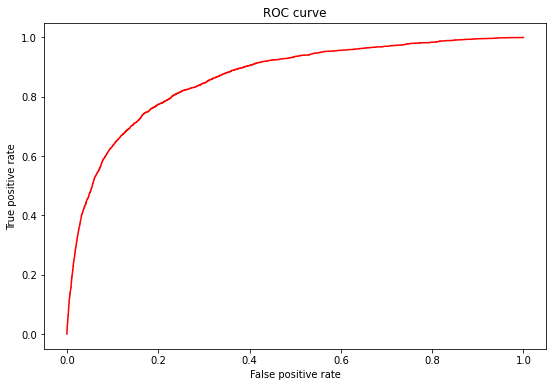

In [ ]:
plot_roc_curve(clf, X_test, y_test)

### 5. Create submission to Kaggle

In [ ]:
predictions = clf.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
predictions.shape

(101503,)

In [ ]:
# Save the predictions to a CSV file
sub = pd.read_csv('https://raw.githubusercontent.com/Astralex98/Give-me-some-credit-Kaggle-/main/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('MySubmission.csv', index=False)
sub

,Id,Probability
0,1,0.532371
1,2,0.383289
...,...,...
101501,101502,0.440183
101502,101503,0.359060


As a result we will have:

**Public** score = 0.8492

**Private** score = 0.8551

